### Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, matthews_corrcoef

# Optional: Set the style for seaborn plots
sns.set_theme(style="whitegrid")

# Set pandas options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Read Data

In [2]:
df_raw = pd.read_csv('train.csv')

In [3]:
df_raw.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [5]:
df_raw.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
# Display the entire DataFrame
display(df_raw.describe(include='all'))

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,20758.00000,20758,20758.000000,20758.000000,20758.000000,20758,20758,20758.000000,20758.000000,20758,20758,20758.000000,20758,20758.000000,20758.000000,20758,20758,20758
unique,NaN,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,3,5,7
top,NaN,Female,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_III
freq,NaN,10422,NaN,NaN,NaN,17014,18982,NaN,NaN,17529,20513,NaN,20071,NaN,NaN,15066,16687,4046
mean,10378.50000,NaN,23.841804,1.700245,87.887768,NaN,NaN,2.445908,2.761332,NaN,NaN,2.029418,NaN,0.981747,0.616756,NaN,NaN,NaN
std,5992.46278,NaN,5.688072,0.087312,26.379443,NaN,NaN,0.533218,0.705375,NaN,NaN,0.608467,NaN,0.838302,0.602113,NaN,NaN,NaN
min,0.00000,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,5189.25000,NaN,20.000000,1.631856,66.000000,NaN,NaN,2.000000,3.000000,NaN,NaN,1.792022,NaN,0.008013,0.000000,NaN,NaN,NaN
50%,10378.50000,NaN,22.815416,1.700000,84.064875,NaN,NaN,2.393837,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.573887,NaN,NaN,NaN
75%,15567.75000,NaN,26.000000,1.762887,111.600553,NaN,NaN,3.000000,3.000000,NaN,NaN,2.549617,NaN,1.587406,1.000000,NaN,NaN,NaN


In [7]:
df_raw.sort_values(by='NObeyesdad', ascending=True).head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
8109,8109,Female,16.913841,1.704193,50.173425,no,yes,2.000000,3.558637,Sometimes,no,1.000000,no,0.955317,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
1840,1840,Male,22.814657,1.769269,51.132809,yes,yes,2.000000,3.000000,Sometimes,no,1.274774,no,0.112454,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
4278,4278,Male,17.767432,1.841908,60.000000,yes,yes,2.000000,4.000000,Sometimes,no,2.000000,no,2.000000,1.000000,no,Automobile,Insufficient_Weight
14098,14098,Male,18.000000,1.755926,52.331172,no,yes,1.362441,3.000000,Sometimes,no,2.000000,no,0.021120,1.285838,Sometimes,Public_Transportation,Insufficient_Weight
9115,9115,Male,17.210933,1.819557,58.325122,yes,yes,2.559600,4.000000,Sometimes,no,2.000000,no,2.000000,0.000000,Sometimes,Automobile,Insufficient_Weight


### Exploratory Data Analysis 

In [8]:
# Copy the dataframe
df = df_raw.copy()

# Drop the columns that are not needed
df = df.drop(['id'], axis=1)


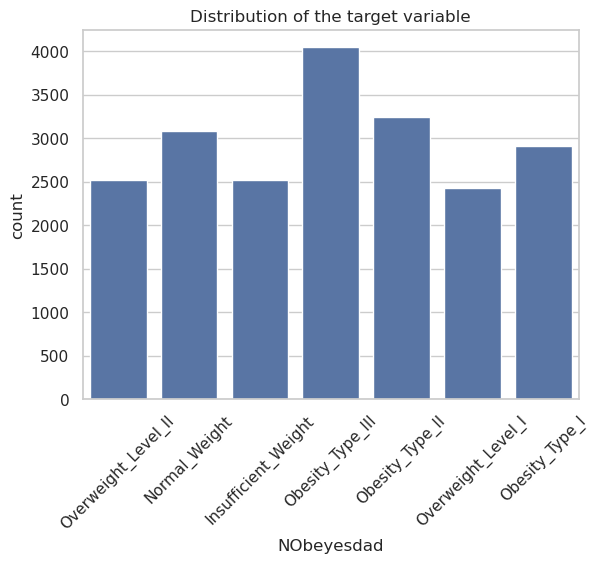

In [9]:
# Distribution of the target variable

sns.countplot(x='NObeyesdad', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of the target variable')
plt.show()

In [10]:
# Copy the dataframe
df_eda = df.copy()

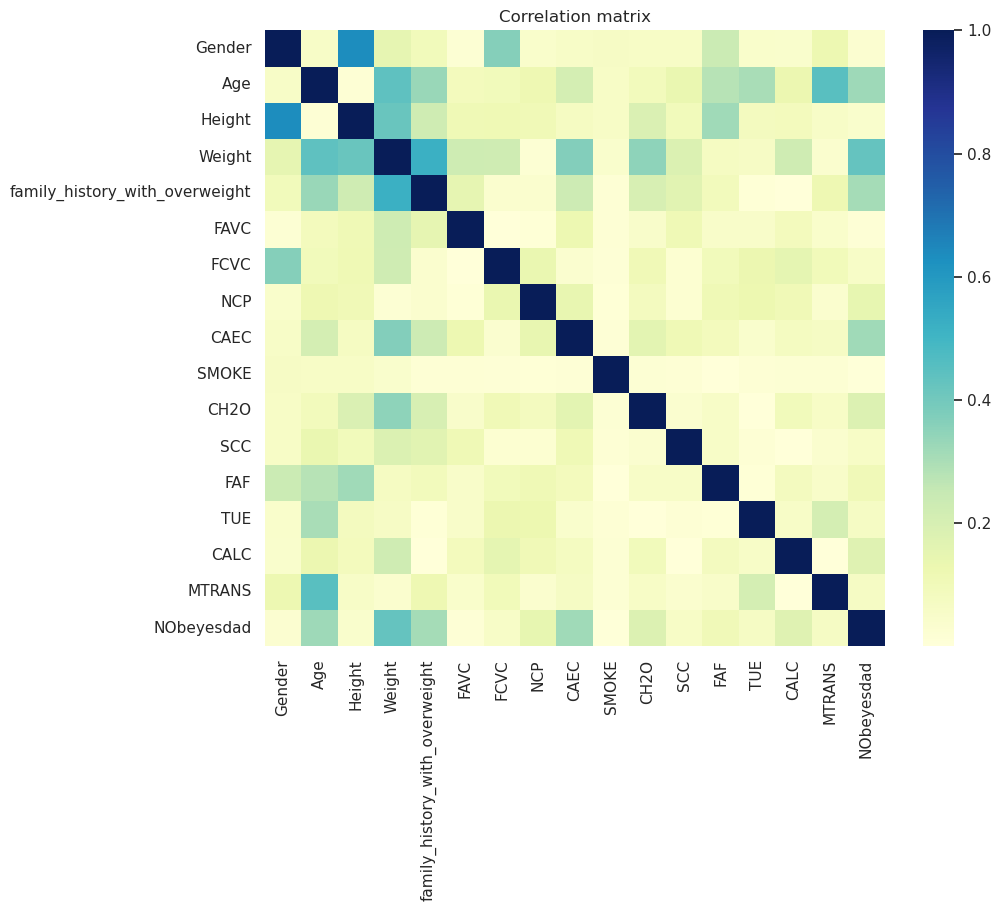

In [11]:
from sklearn.preprocessing import LabelEncoder

# Identify the categorical columns
categorical_columns = df_eda.select_dtypes(include=['object']).columns

# Transform categorical variables 
label_encoder = LabelEncoder()
for column in categorical_columns:
    df_eda[column] = label_encoder.fit_transform(df_eda[column].astype(str))

# Correlation matrix
corr = df_eda.corr('spearman').abs()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation matrix')
plt.show()

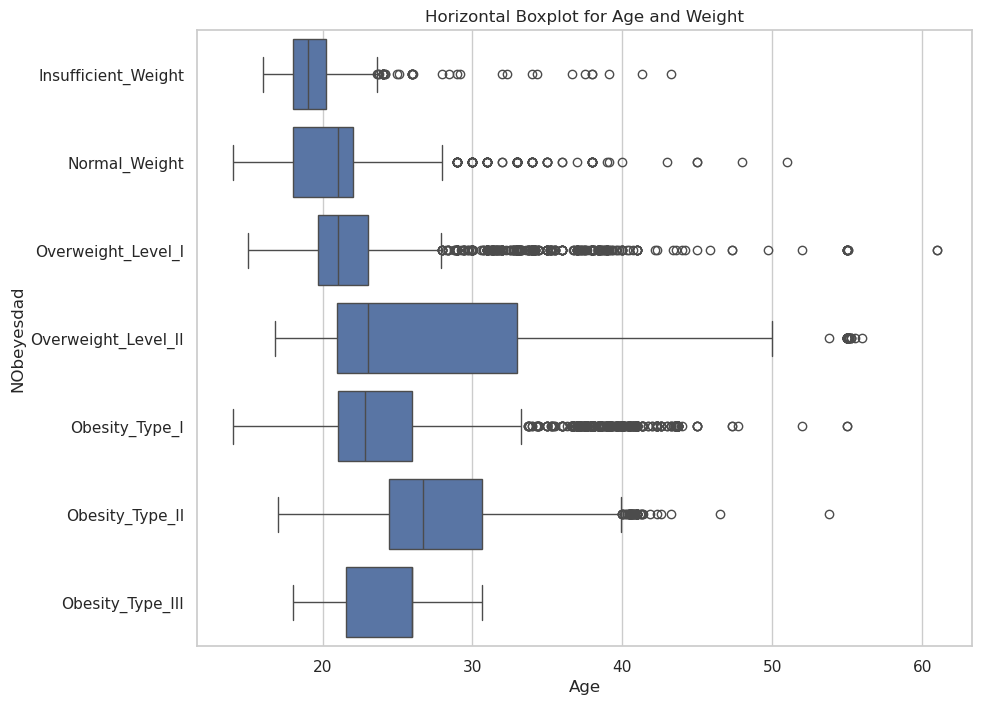

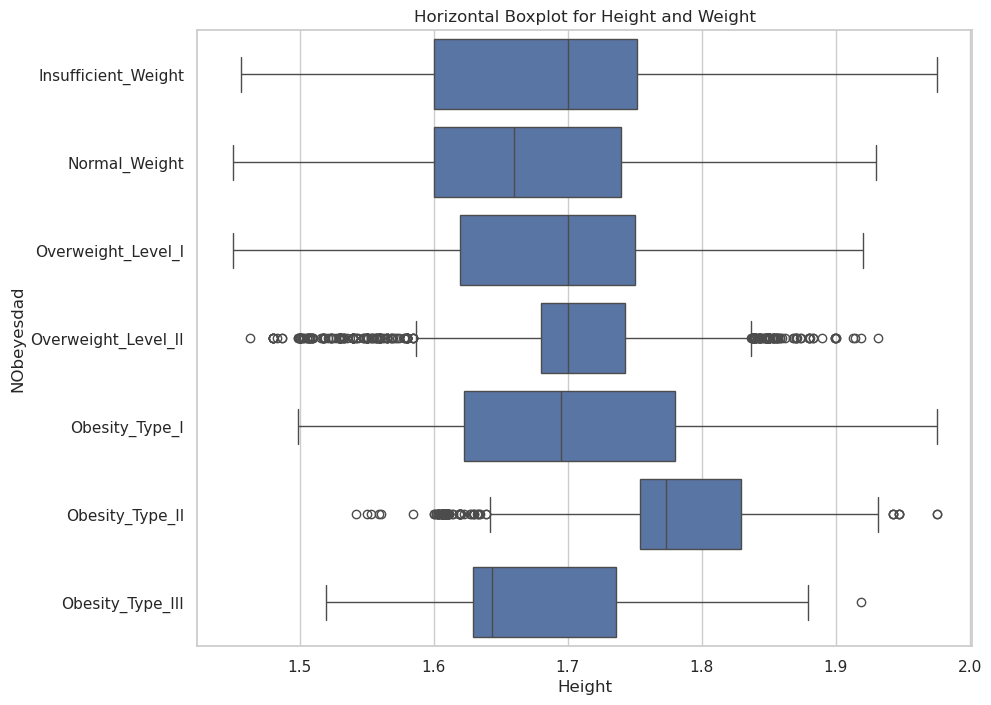

In [12]:
# Ensure the order list matches the unique values in the 'NObeyesdad' column
nobeyesdad_order = [
    'Insufficient_Weight', 
    'Normal_Weight', 
    'Overweight_Level_I', 
    'Overweight_Level_II', 
    'Obesity_Type_I', 
    'Obesity_Type_II', 
    'Obesity_Type_III'
]

# Ensure the order list matches the unique values in the 'CAEC' column
caec_order = ['Always', 'Frequently', 'Sometimes', 'no']

# Horizontal boxplot for Age and Weight
plt.figure(figsize=(10, 8))
sns.boxplot(x='Age', y='NObeyesdad', data=df, orient='h', order=nobeyesdad_order)
plt.title('Horizontal Boxplot for Age and Weight')
plt.xlabel('Age')
plt.ylabel('NObeyesdad')
plt.show()

# Horizontal boxplot for Height and Weight
plt.figure(figsize=(10, 8))
sns.boxplot(x='Height', y='NObeyesdad', data=df, orient='h', order=nobeyesdad_order)
plt.title('Horizontal Boxplot for Height and Weight')
plt.xlabel('Height')
plt.ylabel('NObeyesdad')
plt.show()



### Preprocessing

In [13]:
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [14]:
categorical_columns = X.select_dtypes(include=['object']).columns
categorical_columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')

In [15]:
print(df['CAEC'].unique())
print(df['CALC'].unique())

['Sometimes' 'Frequently' 'no' 'Always']
['Sometimes' 'no' 'Frequently']


In [16]:
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'MTRANS']
ordinal_features = ['CAEC', 'CALC']

In [17]:
#  Fix skewness in the numerical features
from scipy.stats import skew

# Calculate the skewness of the numerical features
skewness = X_train[numerical_features].apply(lambda x: skew(x)).sort_values(ascending=False)

# Filter the numerical features with skewness greater than 0.5
skewness = skewness[abs(skewness) > 0.5]

# Apply the Box-Cox transformation to fix the skewness
from scipy.special import boxcox1p

# Define the skewness transformation threshold
skewness_threshold = 0.5

# Apply the Box-Cox transformation to the numerical features with skewness greater than the threshold
for feature in skewness.index:
    X_train[feature] = boxcox1p(X_train[feature], 0.15)
    X_test[feature] = boxcox1p(X_test[feature], 0.15)

# Calculate the skewness of the transformed numerical features
skewness = X_train[numerical_features].apply(lambda x: skew(x)).sort_values(ascending=False)

# Display the skewness of the transformed numerical features
skewness

Age       0.944377
TUE       0.258395
Weight    0.094943
Height    0.006698
FAF      -0.025442
CH2O     -0.218418
FCVC     -0.355573
NCP      -1.834059
dtype: float64

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler, LabelBinarizer
import pandas as pd


# Define preprocessing for numerical features (Imputation only)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))
])

# Define preprocessing for categorical features (Imputation + OneHotEncoder)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the ordinal transformer using the categories from categories_dict
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('ordinal', OrdinalEncoder(categories=[['no', 'Sometimes', 'Frequently', 'Always'], ['no', 'Sometimes', 'Frequently']]))
])

# Combine preprocessing steps for each type of feature (without scaling)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
    ]
)

# Fit and transform the training data without scaling
X_train_noscaled = preprocessor.fit_transform(X_train)
X_test_noscaled = preprocessor.transform(X_test)

# Define the full pipeline with scaling applied after encoding
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),   # Apply all feature transformations
    ('scaler', RobustScaler())        # Apply scaling after encoding
])

# Fit and transform the training data
X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)

# Convert the scaled data into a DataFrame 
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train.index, columns=feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test.index, columns=feature_names)

# Convert the noscaled data into a DataFrame
X_train_noscaled_df = pd.DataFrame(X_train_noscaled, index=X_train.index, columns=feature_names)
X_test_noscaled_df = pd.DataFrame(X_test_noscaled, index=X_test.index, columns=feature_names)

# Scaled the target variable
label_scaler = LabelEncoder()
y_train_scaled = label_scaler.fit_transform(y_train.values.ravel())
y_test_scaled = label_scaler.transform(y_test.values.ravel())

# Verify the shapes
print(X_train_scaled_df.shape)
print(X_test_scaled_df.shape)
print(y_train_scaled.shape)
print(y_test_scaled.shape)

(14530, 25)
(6228, 25)
(14530,)
(6228,)


### Models

In [19]:
rs = 42

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold

# Use Stratified KFold for preserving the class distribution
cv = StratifiedKFold(n_splits=5)

# Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],  # Removed 'lbfgs' due to incompatibility with 'l1'
}
logistic_model = LogisticRegression(random_state=rs)
logistic_grid = RandomizedSearchCV(logistic_model, param_grid, cv=cv, n_jobs=-1)

# KNN
param_grid = {
    'n_neighbors': np.arange(3,21,1),  # Add higher values
    'weights': ['uniform', 'distance'],  # 'distance' can reduce overfitting
    'metric': ['manhattan', 'minkowski'],  # Use selective metrics
    'p': [1, 2],  # 1 for Manhattan, 2 for Euclidean
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights': ['uniform', 'distance']
}

knn_model = KNeighborsClassifier()
knn_grid = RandomizedSearchCV(knn_model, param_grid, cv=cv, n_jobs=-1)

""" # SVM #Takes a lot of time to run
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'coef0': [0.0, 0.1, 0.5, 1.0],
    'shrinking': [True, False],
}

svm_model = SVC(random_state=rs)
svm_grid = RandomizedSearchCV(svm_model, param_grid, cv=cv, n_jobs=-1)  """

# Gaussian Naive Bayes
param_grid = {
    'var_smoothing': [1e-9, 1e-10, 1e-11, 1e-12, 1e-13]
}

gnb_model = GaussianNB()
gnb_grid = RandomizedSearchCV(gnb_model, param_grid, cv=cv, n_jobs=-1)

# Decision Tree
param_grid = {
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'ccp_alpha': np.linspace(0, 0.05, 50),
}

dt_model = DecisionTreeClassifier(random_state=rs)
dt_grid = RandomizedSearchCV(dt_model, param_grid, cv=cv, n_jobs=-1)

# Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],  # Drop 'auto' to reduce complexity
    'bootstrap': [True],  # Generally bootstrap=True is better for reducing overfitting
    'ccp_alpha': np.linspace(0, 0.05, 50),
}

rf_model = RandomForestClassifier(random_state=rs)
rf_grid = RandomizedSearchCV(rf_model, param_grid, cv=cv, n_jobs=-1)

# Extra Trees
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],  # Extra Trees generally performs better without bootstrapping
    'ccp_alpha': np.linspace(0, 0.05, 50),
}

et_model = ExtraTreesClassifier(random_state=rs)
et_grid = RandomizedSearchCV(et_model, param_grid, cv=cv, n_jobs=-1)

# AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1],  # Use lower learning rates to avoid overfitting
    'estimator__max_depth': [1, 2, 3, 4],
}

ab_model = AdaBoostClassifier(random_state=rs, algorithm='SAMME', estimator=DecisionTreeClassifier(max_depth=1))
ab_grid = RandomizedSearchCV(ab_model, param_grid, cv=cv, n_jobs=-1)

# Neural Networks
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 50), (100, 100), (100, 50, 100)],
    'activation': ['tanh', 'relu'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

mlp_model = MLPClassifier(random_state=rs, max_iter=5000, solver='adam', early_stopping=True)
mlp_grid = RandomizedSearchCV(mlp_model, param_grid, cv=cv, n_jobs=-1)

# Models dictionary 
models = {
    'Logistic Regression': logistic_grid,
    'KNN': knn_grid,
    #'SVM': svm_grid,
    'Gaussian Naive Bayes': gnb_grid,
    'Decision Tree': dt_grid,
    'Random Forest': rf_grid,
    'Extra Trees': et_grid,
    'AdaBoost': ab_grid,
    'Neural Networks': mlp_grid
}

### Model training and Evaluation

In [21]:
### Model training and Evaluation Function 
def evaluate_models(models=models, 
                    X_train_noscaled=X_train_noscaled,
                    X_test_noscaled=X_test_noscaled, 
                    X_train_scaled=X_train_scaled, 
                    X_test_scaled=X_test_scaled,
                    y_train=y_train_scaled, 
                    y_test=y_test_scaled):
    
    # Initialize empty lists to store the results for both training and test data
    noscaled_results = []
    scaled_results = []

    # Wrap the loop with tqdm for tracking
    for name, model in tqdm(models.items(), desc="Evaluating models"):
        
        # Model training with non-scaled data
        model.fit(X_train_noscaled, y_train)

        # Predictions and metrics for training data
        y_train_pred = model.predict(X_train_noscaled)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_precision, train_recall, train_f1_score, _ = precision_recall_fscore_support(y_train, y_train_pred, average='weighted')
        train_mcc = matthews_corrcoef(y_train, y_train_pred)

        # Predictions and metrics for test data
        y_test_pred = model.predict(X_test_noscaled)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision, test_recall, test_f1_score, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
        test_mcc = matthews_corrcoef(y_test, y_test_pred)

        # Append the test results to the test list
        noscaled_results.append({
            'Model': name,
            'Accuracy Train': train_accuracy,
            'Accuracy Test': test_accuracy,
            'Precision Train': train_precision,
            'Precision Test': test_precision,
            'Recall Train': train_recall,
            'Recall Test': test_recall,
            'F1 Train': train_f1_score,
            'F1 Test': test_f1_score,
            'MCC Train': train_mcc,
            'MCC Test': test_mcc
        })

        # Model training with scaled data
        model.fit(X_train_scaled, y_train)

        # Predictions and metrics for training data
        y_train_pred = model.predict(X_train_scaled)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_precision, train_recall, train_f1_score, _ = precision_recall_fscore_support(y_train, y_train_pred, average='weighted', zero_division=0)
        train_mcc = matthews_corrcoef(y_train, y_train_pred)

        # Predictions and metrics for test data
        y_test_pred = model.predict(X_test_scaled)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision, test_recall, test_f1_score, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted', zero_division=0)   
        test_mcc = matthews_corrcoef(y_test, y_test_pred)

        # Append the test results to the test list
        scaled_results.append({
            'Model': name,
            'Accuracy Train': train_accuracy,
            'Accuracy Test': test_accuracy,
            'Precision Train': train_precision,
            'Precision Test': test_precision,
            'Recall Train': train_recall,
            'Recall Test': test_recall,
            'F1 Train': train_f1_score,
            'F1 Test': test_f1_score,
            'MCC Train': train_mcc,
            'MCC Test': test_mcc
        })

    # Convert the lists to DataFrames for both noscaled and scaled results
    noscaled_results_df = pd.DataFrame(noscaled_results)
    scaled_results_df = pd.DataFrame(scaled_results)

    # Generate Markdown content for both tables
    markdown_content = "### Model Evaluation\n\n"

    # Convert noscaled DataFrame to Markdown
    if not noscaled_results_df.empty:
        noscaled_table_md = noscaled_results_df.to_markdown(index=False)
        # Add title for the noscaled metrics table
        markdown_content += "#### NoScaled Metrics\n\n"
        
        # Center the headers for the noscaled table
        lines = noscaled_table_md.split('\n')
        if len(lines) > 1:
            header = lines[0]
            separator = lines[1]
            centered_header = '| ' + ' | '.join([f'<center>{col}</center>' for col in header.split('|')[1:-1]]) + ' |'
            centered_train_table_md = '\n'.join([centered_header, separator] + lines[2:])
            # Add the centered noscaled table to the Markdown content
            markdown_content += centered_train_table_md + "\n\n"
        else:
            markdown_content += noscaled_table_md + "\n\n"
    else:
        markdown_content += "#### NoScaled Metrics\n\nNo data available.\n\n"

    # Convert scaled DataFrame to Markdown
    if not scaled_results_df.empty:
        scaled_table_md = scaled_results_df.to_markdown(index=False)
        # Add title for the scaled metrics table
        markdown_content += "#### Scaled Metrics\n\n"
        
        # Center the headers for the scaled table
        lines = scaled_table_md.split('\n')
        if len(lines) > 1:
            header = lines[0]
            separator = lines[1]
            centered_header = '| ' + ' | '.join([f'<center>{col}</center>' for col in header.split('|')[1:-1]]) + ' |'
            centered_test_table_md = '\n'.join([centered_header, separator] + lines[2:])
            # Add the centered scaled table to the Markdown content
            markdown_content += centered_test_table_md + "\n\n"
        else:
            markdown_content += scaled_table_md + "\n\n"
    else:
        markdown_content += "#### Scaled Metrics\n\nNo data available.\n\n"

    return markdown_content

In [22]:
# Evaluate the models
markdown_content = evaluate_models()

# Display the results
display(Markdown(markdown_content))

Evaluating models:   0%|          | 0/8 [00:00<?, ?it/s]/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The m

### Model Evaluation

#### NoScaled Metrics

| <center> Model                </center> | <center>   Accuracy Train </center> | <center>   Accuracy Test </center> | <center>   Precision Train </center> | <center>   Precision Test </center> | <center>   Recall Train </center> | <center>   Recall Test </center> | <center>   F1 Train </center> | <center>   F1 Test </center> | <center>   MCC Train </center> | <center>   MCC Test </center> |
|:---------------------|-----------------:|----------------:|------------------:|-----------------:|---------------:|--------------:|-----------:|----------:|------------:|-----------:|
| Logistic Regression  |         0.765451 |        0.753211 |          0.756661 |         0.741341 |       0.765451 |      0.753211 |   0.75981  |  0.745555 |    0.725055 |   0.710805 |
| KNN                  |         1        |        0.862396 |          1        |         0.862089 |       1        |      0.862396 |   1        |  0.861191 |    1        |   0.838979 |
| Gaussian Naive Bayes |         0.585891 |        0.585742 |          0.607625 |         0.60715  |       0.585891 |      0.585742 |   0.55252  |  0.553283 |    0.525428 |   0.52503  |
| Decision Tree        |         0.561597 |        0.555395 |          0.456235 |         0.448631 |       0.561597 |      0.555395 |   0.488258 |  0.482936 |    0.500898 |   0.492486 |
| Random Forest        |         0.874604 |        0.862396 |          0.876208 |         0.86269  |       0.874604 |      0.862396 |   0.872593 |  0.860045 |    0.853587 |   0.839175 |
| Extra Trees          |         0.863661 |        0.831888 |          0.862824 |         0.828739 |       0.863661 |      0.831888 |   0.861088 |  0.828033 |    0.840462 |   0.803149 |
| AdaBoost             |         0.81872  |        0.822575 |          0.816973 |         0.821567 |       0.81872  |      0.822575 |   0.814285 |  0.818149 |    0.788213 |   0.79287  |
| Neural Networks      |         0.86669  |        0.861914 |          0.866777 |         0.861474 |       0.86669  |      0.861914 |   0.866253 |  0.861083 |    0.843831 |   0.838261 |

#### Scaled Metrics

| <center> Model                </center> | <center>   Accuracy Train </center> | <center>   Accuracy Test </center> | <center>   Precision Train </center> | <center>   Precision Test </center> | <center>   Recall Train </center> | <center>   Recall Test </center> | <center>   F1 Train </center> | <center>   F1 Test </center> | <center>   MCC Train </center> | <center>   MCC Test </center> |
|:---------------------|-----------------:|----------------:|------------------:|-----------------:|---------------:|--------------:|-----------:|----------:|------------:|-----------:|
| Logistic Regression  |         0.866139 |        0.86368  |          0.864817 |         0.86253  |       0.866139 |      0.86368  |   0.865214 |  0.86264  |    0.84308  |   0.840276 |
| KNN                  |         1        |        0.795922 |          1        |         0.791513 |       1        |      0.795922 |   1        |  0.792092 |    1        |   0.76085  |
| Gaussian Naive Bayes |         0.583345 |        0.584136 |          0.605047 |         0.605299 |       0.583345 |      0.584136 |   0.548752 |  0.550439 |    0.523439 |   0.524118 |
| Decision Tree        |         0.597247 |        0.59377  |          0.50701  |         0.503692 |       0.597247 |      0.59377  |   0.532774 |  0.529383 |    0.550067 |   0.545787 |
| Random Forest        |         0.792017 |        0.793353 |          0.811461 |         0.813282 |       0.792017 |      0.793353 |   0.77511  |  0.777574 |    0.761634 |   0.762772 |
| Extra Trees          |         0.716311 |        0.717726 |          0.73117  |         0.73043  |       0.716311 |      0.717726 |   0.684113 |  0.686717 |    0.671736 |   0.673308 |
| AdaBoost             |         0.892223 |        0.890173 |          0.892199 |         0.889899 |       0.892223 |      0.890173 |   0.892172 |  0.889931 |    0.873615 |   0.871241 |
| Neural Networks      |         0.882312 |        0.879576 |          0.882339 |         0.879256 |       0.882312 |      0.879576 |   0.881809 |  0.878921 |    0.862134 |   0.858934 |



### Feature Selection

In [23]:
# Fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=rf_grid.best_params_['n_estimators'],
                                    max_depth=rf_grid.best_params_['max_depth'],
                                    min_samples_split=rf_grid.best_params_['min_samples_split'],
                                    min_samples_leaf=rf_grid.best_params_['min_samples_leaf'],
                                    max_features=rf_grid.best_params_['max_features'],
                                    bootstrap=rf_grid.best_params_['bootstrap'],
                                    ccp_alpha=rf_grid.best_params_['ccp_alpha'],
                                    random_state=rs)

rf_model.fit(X_train_noscaled_df, y_train)

# Get feature importances from the model
importances = rf_model.feature_importances_

# Create a DataFrame to rank features by importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train_noscaled_df.columns,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top features that cumulatively explain 95% of the importance
cumulative_importance = 0.95
top_features_rf = feature_importance_df['Feature'].values[feature_importance_df['Importance'].cumsum() < cumulative_importance]

# Display the top features
display(top_features_rf)

array(['num__Weight', 'num__FCVC', 'cat__Gender_Male',
       'cat__Gender_Female', 'num__Age', 'num__Height',
       'cat__family_history_with_overweight_no', 'num__TUE', 'num__CH2O',
       'cat__family_history_with_overweight_yes'], dtype=object)

In [24]:
# Filter the top features from the training and test sets for scaled data
X_train_top_rf = X_train_scaled_df[top_features_rf]
X_test_top_rf = X_test_scaled_df[top_features_rf]

# Evaluate the models with the top features
markdown_top_content = evaluate_models( X_train_scaled=X_train_top_rf,
                                        X_test_scaled=X_test_top_rf)

# Display the results
display(Markdown(markdown_top_content))

Evaluating models:   0%|          | 0/8 [00:00<?, ?it/s]/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The m

### Model Evaluation

#### NoScaled Metrics

| <center> Model                </center> | <center>   Accuracy Train </center> | <center>   Accuracy Test </center> | <center>   Precision Train </center> | <center>   Precision Test </center> | <center>   Recall Train </center> | <center>   Recall Test </center> | <center>   F1 Train </center> | <center>   F1 Test </center> | <center>   MCC Train </center> | <center>   MCC Test </center> |
|:---------------------|-----------------:|----------------:|------------------:|-----------------:|---------------:|--------------:|-----------:|----------:|------------:|-----------:|
| Logistic Regression  |         0.765313 |        0.75273  |          0.756508 |         0.740881 |       0.765313 |      0.75273  |   0.759671 |  0.745106 |    0.724891 |   0.710232 |
| KNN                  |         0.870268 |        0.86079  |          0.869521 |         0.860216 |       0.870268 |      0.86079  |   0.869518 |  0.859619 |    0.847986 |   0.837038 |
| Gaussian Naive Bayes |         0.585891 |        0.585742 |          0.607625 |         0.60715  |       0.585891 |      0.585742 |   0.55252  |  0.553283 |    0.525428 |   0.52503  |
| Decision Tree        |         0.628424 |        0.630218 |          0.623159 |         0.625857 |       0.628424 |      0.630218 |   0.621572 |  0.623962 |    0.564359 |   0.566438 |
| Random Forest        |         0.791672 |        0.78966  |          0.809781 |         0.805651 |       0.791672 |      0.78966  |   0.776427 |  0.775312 |    0.760434 |   0.757594 |
| Extra Trees          |         0.649828 |        0.654464 |          0.667271 |         0.652125 |       0.649828 |      0.654464 |   0.605049 |  0.609275 |    0.595565 |   0.60096  |
| AdaBoost             |         0.892223 |        0.890173 |          0.892199 |         0.889899 |       0.892223 |      0.890173 |   0.892172 |  0.889931 |    0.873615 |   0.871241 |
| Neural Networks      |         0.859532 |        0.858542 |          0.859568 |         0.857863 |       0.859532 |      0.858542 |   0.859374 |  0.858093 |    0.835287 |   0.834108 |

#### Scaled Metrics

| <center> Model                </center> | <center>   Accuracy Train </center> | <center>   Accuracy Test </center> | <center>   Precision Train </center> | <center>   Precision Test </center> | <center>   Recall Train </center> | <center>   Recall Test </center> | <center>   F1 Train </center> | <center>   F1 Test </center> | <center>   MCC Train </center> | <center>   MCC Test </center> |
|:---------------------|-----------------:|----------------:|------------------:|-----------------:|---------------:|--------------:|-----------:|----------:|------------:|-----------:|
| Logistic Regression  |         0.856986 |        0.858221 |          0.855611 |         0.857126 |       0.856986 |      0.858221 |   0.855992 |  0.857156 |    0.832365 |   0.833897 |
| KNN                  |         0.993668 |        0.815992 |          0.993686 |         0.815683 |       0.993668 |      0.815992 |   0.993662 |  0.814707 |    0.992578 |   0.784382 |
| Gaussian Naive Bayes |         0.582244 |        0.5851   |          0.548215 |         0.555438 |       0.582244 |      0.5851   |   0.5335   |  0.53761  |    0.515473 |   0.519422 |
| Decision Tree        |         0.9468   |        0.818882 |          0.946965 |         0.816296 |       0.9468   |      0.818882 |   0.946533 |  0.817223 |    0.937696 |   0.787628 |
| Random Forest        |         0.920096 |        0.88632  |          0.920081 |         0.885917 |       0.920096 |      0.88632  |   0.919774 |  0.885902 |    0.906352 |   0.866707 |
| Extra Trees          |         0.957536 |        0.880379 |          0.957416 |         0.879303 |       0.957536 |      0.880379 |   0.957428 |  0.87973  |    0.950203 |   0.859708 |
| AdaBoost             |         0.883689 |        0.880218 |          0.883314 |         0.879841 |       0.883689 |      0.880218 |   0.883324 |  0.879693 |    0.863656 |   0.859641 |
| Neural Networks      |         0.892911 |        0.874599 |          0.894244 |         0.875082 |       0.892911 |      0.874599 |   0.893321 |  0.87466  |    0.874485 |   0.852983 |



In [25]:
from sklearn.feature_selection import RFECV

# Initialize RFE
model = RandomForestClassifier(n_estimators=rf_grid.best_params_['n_estimators'],
                                    max_depth=rf_grid.best_params_['max_depth'],
                                    min_samples_split=rf_grid.best_params_['min_samples_split'],
                                    min_samples_leaf=rf_grid.best_params_['min_samples_leaf'],
                                    max_features=rf_grid.best_params_['max_features'],
                                    bootstrap=rf_grid.best_params_['bootstrap'],
                                    ccp_alpha=rf_grid.best_params_['ccp_alpha'],
                                    random_state=rs)

rfecv = RFECV(model, cv=cv)  # Cross-validation to find the optimal number of features

# Fit RFE
rfecv.fit(X_train_scaled, y_train)

# Number of features
top_features_rfecv = rfecv.support_
print("Optimal number of features : %d" % rfecv.n_features_)


Optimal number of features : 17


In [26]:
# Filter the top features from the training and test sets
X_train_top_rfecv = X_train_scaled_df.iloc[:, top_features_rfecv]
X_test_top_rfecv = X_test_scaled_df.iloc[:, top_features_rfecv]

# Evaluate the models with the top features
markdown_top_content = evaluate_models( X_train_scaled=X_train_top_rfecv,
                                        X_test_scaled=X_test_top_rfecv)

# Display the results
display(Markdown(markdown_top_content))

Evaluating models:   0%|          | 0/8 [00:00<?, ?it/s]/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The m

### Model Evaluation

#### NoScaled Metrics

| <center> Model                </center> | <center>   Accuracy Train </center> | <center>   Accuracy Test </center> | <center>   Precision Train </center> | <center>   Precision Test </center> | <center>   Recall Train </center> | <center>   Recall Test </center> | <center>   F1 Train </center> | <center>   F1 Test </center> | <center>   MCC Train </center> | <center>   MCC Test </center> |
|:---------------------|-----------------:|----------------:|------------------:|-----------------:|---------------:|--------------:|-----------:|----------:|------------:|-----------:|
| Logistic Regression  |         0.765451 |        0.753211 |          0.756661 |         0.741341 |       0.765451 |      0.753211 |   0.75981  |  0.745555 |    0.725055 |   0.710805 |
| KNN                  |         1        |        0.864644 |          1        |         0.864283 |       1        |      0.864644 |   1        |  0.86346  |    1        |   0.841598 |
| Gaussian Naive Bayes |         0.585891 |        0.585742 |          0.607625 |         0.60715  |       0.585891 |      0.585742 |   0.55252  |  0.553283 |    0.525428 |   0.52503  |
| Decision Tree        |         0.63744  |        0.632306 |          0.621499 |         0.608299 |       0.63744  |      0.632306 |   0.594679 |  0.589267 |    0.583071 |   0.576625 |
| Random Forest        |         0.747557 |        0.748394 |          0.776575 |         0.779586 |       0.747557 |      0.748394 |   0.718877 |  0.721557 |    0.712981 |   0.713409 |
| Extra Trees          |         0.871025 |        0.838471 |          0.869999 |         0.835868 |       0.871025 |      0.838471 |   0.868663 |  0.83494  |    0.849052 |   0.810877 |
| AdaBoost             |         0.88713  |        0.886641 |          0.886994 |         0.886223 |       0.88713  |      0.886641 |   0.88698  |  0.886197 |    0.867647 |   0.867135 |
| Neural Networks      |         0.866208 |        0.860951 |          0.868126 |         0.862813 |       0.866208 |      0.860951 |   0.86581  |  0.860063 |    0.843613 |   0.837594 |

#### Scaled Metrics

| <center> Model                </center> | <center>   Accuracy Train </center> | <center>   Accuracy Test </center> | <center>   Precision Train </center> | <center>   Precision Test </center> | <center>   Recall Train </center> | <center>   Recall Test </center> | <center>   F1 Train </center> | <center>   F1 Test </center> | <center>   MCC Train </center> | <center>   MCC Test </center> |
|:---------------------|-----------------:|----------------:|------------------:|-----------------:|---------------:|--------------:|-----------:|----------:|------------:|-----------:|
| Logistic Regression  |         0.863661 |        0.865286 |          0.862246 |         0.864085 |       0.863661 |      0.865286 |   0.862723 |  0.864227 |    0.840165 |   0.84215  |
| KNN                  |         1        |        0.799454 |          1        |         0.794653 |       1        |      0.799454 |   1        |  0.7956   |    1        |   0.764946 |
| Gaussian Naive Bayes |         0.628768 |        0.627328 |          0.627503 |         0.625875 |       0.628768 |      0.627328 |   0.603649 |  0.603417 |    0.570096 |   0.568185 |
| Decision Tree        |         0.882794 |        0.78966  |          0.883092 |         0.787775 |       0.882794 |      0.78966  |   0.882111 |  0.788012 |    0.862753 |   0.753455 |
| Random Forest        |         0.820991 |        0.823539 |          0.831666 |         0.831996 |       0.820991 |      0.823539 |   0.810593 |  0.813657 |    0.793298 |   0.795896 |
| Extra Trees          |         0.818789 |        0.820006 |          0.818467 |         0.819468 |       0.818789 |      0.820006 |   0.81251  |  0.81385  |    0.788534 |   0.789936 |
| AdaBoost             |         0.89766  |        0.891137 |          0.897474 |         0.890526 |       0.89766  |      0.891137 |   0.897511 |  0.890737 |    0.87999  |   0.872345 |
| Neural Networks      |         0.871094 |        0.86641  |          0.869939 |         0.865507 |       0.871094 |      0.86641  |   0.869491 |  0.864523 |    0.849158 |   0.843794 |



### Variance Inflation Factir (VIF) to adress Multicollinearity 

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

# Calculate VIF for the predictors
vif_data = calculate_vif(X_train_scaled_df)

# Print VIF values
print("VIF Values:\n", vif_data)

# Remove predictors with high VIF values (e.g., VIF > 10)
high_vif_features = vif_data[vif_data["VIF"] > 10]["feature"]

# Remove the features with high VIF values from scale data
xtrain_reduced = X_train_scaled_df.drop(columns=high_vif_features)
xtest_reduced = X_test_scaled_df.drop(columns=high_vif_features)

# Evaluate the models with the reduced features
markdown_top_content = evaluate_models( X_train_scaled=xtrain_reduced,
                                        X_test_scaled=xtest_reduced)

# Print the shape of the reduced data
print("Shape of the train reduced data:", xtrain_reduced.shape)
print("Shape of the test reduced data:", xtest_reduced.shape)

# Display the results
display(Markdown(markdown_top_content))


/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF Values:
                                     feature       VIF
0                                  num__Age  2.118428
1                               num__Height  2.136805
2                               num__Weight  2.101511
3                                 num__FCVC  1.244223
4                                  num__NCP  1.208551
5                                 num__CH2O  1.150332
6                                  num__FAF  1.276355
7                                  num__TUE  1.185814
8                        cat__Gender_Female       inf
9                          cat__Gender_Male       inf
10   cat__family_history_with_overweight_no       inf
11  cat__family_history_with_overweight_yes       inf
12                             cat__FAVC_no       inf
13                            cat__FAVC_yes       inf
14                            cat__SMOKE_no       inf
15                           cat__SMOKE_yes       inf
16                              cat__SCC_no       inf
17             

Evaluating models:   0%|          | 0/8 [00:00<?, ?it/s]/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The m

Shape of the train reduced data: (14530, 10)
Shape of the test reduced data: (6228, 10)


### Model Evaluation

#### NoScaled Metrics

| <center> Model                </center> | <center>   Accuracy Train </center> | <center>   Accuracy Test </center> | <center>   Precision Train </center> | <center>   Precision Test </center> | <center>   Recall Train </center> | <center>   Recall Test </center> | <center>   F1 Train </center> | <center>   F1 Test </center> | <center>   MCC Train </center> | <center>   MCC Test </center> |
|:---------------------|-----------------:|----------------:|------------------:|-----------------:|---------------:|--------------:|-----------:|----------:|------------:|-----------:|
| Logistic Regression  |         0.764418 |        0.753372 |          0.755227 |         0.741352 |       0.764418 |      0.753372 |   0.758526 |  0.745625 |    0.72385  |   0.710992 |
| KNN                  |         0.872402 |        0.862075 |          0.871623 |         0.861269 |       0.872402 |      0.862075 |   0.871652 |  0.860793 |    0.850481 |   0.838536 |
| Gaussian Naive Bayes |         0.585891 |        0.585742 |          0.607625 |         0.60715  |       0.585891 |      0.585742 |   0.55252  |  0.553283 |    0.525428 |   0.52503  |
| Decision Tree        |         0.633173 |        0.628773 |          0.61541  |         0.603204 |       0.633173 |      0.628773 |   0.588946 |  0.584539 |    0.577919 |   0.572357 |
| Random Forest        |         0.820647 |        0.821452 |          0.83032  |         0.830872 |       0.820647 |      0.821452 |   0.811285 |  0.812234 |    0.792659 |   0.793455 |
| Extra Trees          |         0.808121 |        0.807001 |          0.809048 |         0.807239 |       0.808121 |      0.807001 |   0.801064 |  0.799424 |    0.776201 |   0.774896 |
| AdaBoost             |         0.892223 |        0.890173 |          0.892199 |         0.889899 |       0.892223 |      0.890173 |   0.892172 |  0.889931 |    0.873615 |   0.871241 |
| Neural Networks      |         0.829319 |        0.828838 |          0.828295 |         0.827497 |       0.829319 |      0.828838 |   0.824701 |  0.824117 |    0.80095  |   0.800363 |

#### Scaled Metrics

| <center> Model                </center> | <center>   Accuracy Train </center> | <center>   Accuracy Test </center> | <center>   Precision Train </center> | <center>   Precision Test </center> | <center>   Recall Train </center> | <center>   Recall Test </center> | <center>   F1 Train </center> | <center>   F1 Test </center> | <center>   MCC Train </center> | <center>   MCC Test </center> |
|:---------------------|-----------------:|----------------:|------------------:|-----------------:|---------------:|--------------:|-----------:|----------:|------------:|-----------:|
| Logistic Regression  |         0.850379 |        0.852922 |          0.849725 |         0.851495 |       0.850379 |      0.852922 |   0.849859 |  0.851872 |    0.82459  |   0.827598 |
| KNN                  |         0.998692 |        0.799454 |          0.998693 |         0.796717 |       0.998692 |      0.799454 |   0.998692 |  0.796694 |    0.998467 |   0.76499  |
| Gaussian Naive Bayes |         0.692154 |        0.691554 |          0.681456 |         0.680478 |       0.692154 |      0.691554 |   0.681935 |  0.680606 |    0.639428 |   0.63895  |
| Decision Tree        |         0.485891 |        0.487476 |          0.341152 |         0.342947 |       0.485891 |      0.487476 |   0.378399 |  0.380053 |    0.475785 |   0.478326 |
| Random Forest        |         0.982932 |        0.892742 |          0.982977 |         0.892077 |       0.982932 |      0.892742 |   0.982921 |  0.892089 |    0.97999  |   0.87426  |
| Extra Trees          |         0.803716 |        0.807482 |          0.801636 |         0.804341 |       0.803716 |      0.807482 |   0.794214 |  0.797437 |    0.771404 |   0.775798 |
| AdaBoost             |         0.887061 |        0.88359  |          0.886771 |         0.882887 |       0.887061 |      0.88359  |   0.886801 |  0.882954 |    0.867577 |   0.863544 |
| Neural Networks      |         0.886373 |        0.871066 |          0.88621  |         0.86992  |       0.886373 |      0.871066 |   0.886143 |  0.870058 |    0.86681  |   0.848935 |



### Model training with Polynomial Features

In [28]:
# Polynomial features

from sklearn.preprocessing import PolynomialFeatures
polynomial = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

# Fit and transform the training scaled data
X_train_poly = polynomial.fit_transform(X_train_scaled_df)
X_test_poly = polynomial.transform(X_test_scaled_df)

# Evaluate the models with polynomial features
markdown_poly_content = evaluate_models(X_train_scaled=X_train_poly,
                                        X_test_scaled=X_test_poly)

# Display the results
display(Markdown(markdown_poly_content))

Evaluating models:   0%|          | 0/8 [00:00<?, ?it/s]

/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/anzoar/miniconda3/envs/MLProjects/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

### Model Evaluation

#### NoScaled Metrics

| <center> Model                </center> | <center>   Accuracy Train </center> | <center>   Accuracy Test </center> | <center>   Precision Train </center> | <center>   Precision Test </center> | <center>   Recall Train </center> | <center>   Recall Test </center> | <center>   F1 Train </center> | <center>   F1 Test </center> | <center>   MCC Train </center> | <center>   MCC Test </center> |
|:---------------------|-----------------:|----------------:|------------------:|-----------------:|---------------:|--------------:|-----------:|----------:|------------:|-----------:|
| Logistic Regression  |         0.765451 |        0.753211 |          0.756661 |         0.741341 |       0.765451 |      0.753211 |   0.75981  |  0.745555 |    0.725055 |   0.710805 |
| KNN                  |         1        |        0.86352  |          1        |         0.863361 |       1        |      0.86352  |   1        |  0.862415 |    1        |   0.840288 |
| Gaussian Naive Bayes |         0.585891 |        0.585742 |          0.607625 |         0.60715  |       0.585891 |      0.585742 |   0.55252  |  0.553283 |    0.525428 |   0.52503  |
| Decision Tree        |         0.783551 |        0.768465 |          0.789176 |         0.774149 |       0.783551 |      0.768465 |   0.785763 |  0.770792 |    0.746398 |   0.728681 |
| Random Forest        |         0.760151 |        0.758349 |          0.801624 |         0.79973  |       0.760151 |      0.758349 |   0.732873 |  0.731701 |    0.727941 |   0.72541  |
| Extra Trees          |         0.724845 |        0.728163 |          0.742073 |         0.742133 |       0.724845 |      0.728163 |   0.693603 |  0.697095 |    0.681452 |   0.685336 |
| AdaBoost             |         0.898348 |        0.8921   |          0.898087 |         0.8915   |       0.898348 |      0.8921   |   0.898142 |  0.891702 |    0.880805 |   0.873479 |
| Neural Networks      |         0.862629 |        0.864162 |          0.862215 |         0.863064 |       0.862629 |      0.864162 |   0.862    |  0.863147 |    0.838986 |   0.840787 |

#### Scaled Metrics

| <center> Model                </center> | <center>   Accuracy Train </center> | <center>   Accuracy Test </center> | <center>   Precision Train </center> | <center>   Precision Test </center> | <center>   Recall Train </center> | <center>   Recall Test </center> | <center>   F1 Train </center> | <center>   F1 Test </center> | <center>   MCC Train </center> | <center>   MCC Test </center> |
|:---------------------|-----------------:|----------------:|------------------:|-----------------:|---------------:|--------------:|-----------:|----------:|------------:|-----------:|
| Logistic Regression  |         0.88245  |        0.86641  |          0.881773 |         0.864911 |       0.88245  |      0.86641  |   0.882095 |  0.865536 |    0.862123 |   0.843325 |
| KNN                  |         0.830902 |        0.784522 |          0.830138 |         0.780989 |       0.830902 |      0.784522 |   0.828706 |  0.780922 |    0.802005 |   0.74755  |
| Gaussian Naive Bayes |         0.526084 |        0.521516 |          0.55847  |         0.531123 |       0.526084 |      0.521516 |   0.467505 |  0.461087 |    0.46312  |   0.457109 |
| Decision Tree        |         0.77777  |        0.756423 |          0.782659 |         0.759743 |       0.77777  |      0.756423 |   0.774348 |  0.75248  |    0.741006 |   0.71595  |
| Random Forest        |         0.887749 |        0.876365 |          0.887934 |         0.875709 |       0.887749 |      0.876365 |   0.886553 |  0.874899 |    0.868622 |   0.855222 |
| Extra Trees          |         0.681074 |        0.685132 |          0.685479 |         0.672707 |       0.681074 |      0.685132 |   0.634301 |  0.638302 |    0.630376 |   0.63519  |
| AdaBoost             |         0.86201  |        0.861753 |          0.864091 |         0.864683 |       0.86201  |      0.861753 |   0.861347 |  0.860643 |    0.838815 |   0.838772 |
| Neural Networks      |         0.90351  |        0.870745 |          0.903832 |         0.870538 |       0.90351  |      0.870745 |   0.903393 |  0.87028  |    0.886912 |   0.848535 |



### Bagging

In [29]:
from sklearn.ensemble import BaggingClassifier

# Define the base model
base_model = RandomForestClassifier(n_estimators=rf_grid.best_params_['n_estimators'],
                                    max_depth=rf_grid.best_params_['max_depth'],
                                    min_samples_split=rf_grid.best_params_['min_samples_split'],
                                    min_samples_leaf=rf_grid.best_params_['min_samples_leaf'],
                                    max_features=rf_grid.best_params_['max_features'],
                                    bootstrap=rf_grid.best_params_['bootstrap'],
                                    ccp_alpha=rf_grid.best_params_['ccp_alpha'],
                                    random_state=rs)

# Apply Bagging with 50 estimators (you can change n_estimators as needed)
bagging_model = BaggingClassifier(estimator=base_model, n_estimators=50, random_state=rs, n_jobs=-1)

# Fit the bagging model to training data
bagging_model.fit(X_train_noscaled, y_train_scaled)

# Make predictions
y_pred = bagging_model.predict(X_test_noscaled)

# Evaluate the model
accuracy_train = bagging_model.score(X_train_noscaled, y_train_scaled)
accuracy_test = accuracy_score(y_test_scaled, y_pred)

# Display the accuracy for the trained model and test data 
print(f'Training Accuracy: {accuracy_train:.2f}')
print(f'Test Accuracy: {accuracy_test:.2f}')

Training Accuracy: 0.89
Test Accuracy: 0.88


### XGBOOST

In [41]:
from xgboost import XGBClassifier, callback
from sklearn.model_selection import RandomizedSearchCV

# Parameter grid for XGBoost Classifier
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [2, 5, 7]
}

# Early stopping callback for XGBoost
es = callback.EarlyStopping(
    rounds=10,
    min_delta=1e-3,
    save_best=True,
    maximize=False,
    metric_name='mlogloss',
)

# Initialize XGBoost Regressor model
xgb_model = XGBClassifier(verbosity=0, random_state=42, callbacks=[es], eval_metric='mlogloss', objective='multi:softprob')

# Randomized search over the parameter grid
xgb_grid = RandomizedSearchCV(xgb_model, param_grid_xgb, cv=cv, n_jobs=-1, verbose=0)

# Fit the XGBoost model with early stopping
xgb_grid.fit(X_train_scaled, y_train_scaled, 
             eval_set=[(X_test_scaled, y_test_scaled)],
             verbose=False)

# Make predictions
y_pred = xgb_grid.predict(X_test_scaled)

# Evaluate the model 
_,_,f1_train,_ = precision_recall_fscore_support(y_train_scaled, xgb_grid.predict(X_train_scaled), average='weighted')
_,_,f1_test,_ = precision_recall_fscore_support(y_test_scaled, y_pred, average='weighted')


# Display the evaluation metrics for the trained model and test data
print("Train F1 Score:", f1_train)
print("Test F1 Score:", f1_test)


Train F1 Score: 0.9071291740947062
Test F1 Score: 0.8953549231091104


As this is a slightly **imbalanced dataset**, we focus on the **F1-score**. According to this metric, the best model is the **neural network** since it has one of the highest scores for the test data. Additionally, the score for the training data is very similar, indicating good generalization of the model. This contrasts with other models where the score for the training data is significantly higher, showing overfitting on the training data, which could make the model unreliable.

### Neural Network

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, Sequential, layers
from keras.optimizers import Adam
import keras_tuner as kt
from keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.regularizers import l2

tf.random.set_seed(42)

2024-10-15 13:26:05.456406: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-15 13:26:05.461457: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-15 13:26:05.474031: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-15 13:26:05.504824: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-15 13:26:05.518548: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-15 13:26:05.562210: I tensorflow/core/platform/cpu_feature_gu

In [32]:
y_train_onehot = keras.utils.to_categorical(y_train_scaled)
y_test_onehot = keras.utils.to_categorical(y_test_scaled)

In [33]:
# Configure the search space
hp = kt.engine.hyperparameters.HyperParameters()
# Tuning the number of layers
hp.Int('layers', min_value=1, max_value=5, step=1)
# Tuning the number of units per layer and the dropout rate
for i in range(5):
    hp.Int(f'units_{i}', min_value=8, max_value=128, step=8)
    hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)
#tuning the activation function
hp.Choice('activation', values=['relu', 'tanh', 'elu', 'selu'])
# Tuning the learning rate
hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])
#Tuning the bath size
hp.Choice('batch_size', values=[32, 64, 128, 256, 512, 1024])

def model_builder(hp):
    model = Sequential()

    # Hidden layers with different numbers of units per layer
    for i in range(hp.get('layers')):
        model.add(layers.Dense(units=hp.get(f'units_{i}'),
                               activation=hp.get('activation')
                               ))
        model.add(layers.Dropout(rate=hp.get(f'dropout_{i}')))
        
    # Output layer
    model.add(layers.Dense(7, activation='softmax'))
    
    # Compile the model
    model.compile(
        optimizer=Adam(hp.get('learning_rate'), beta_1=0.9, beta_2=0.999, epsilon=1e-07),
        loss='categorical_crossentropy',
        metrics=['accuracy'],
    )
    
    return model

In [34]:
## Define the tuner
tuner = kt.Hyperband(
    model_builder,
    objective=kt.Objective('val_accuracy', direction='max'),  # Specify the objective with direction
    max_epochs=30,
    factor=3,
    directory='my_dir',
    project_name='my_project',
    hyperparameters=hp,
    overwrite=True
)

# Define early stopping callback
callbacks = [EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True),
                TensorBoard(log_dir='logs')]

In [35]:
tuner.search(
    X_train_scaled,
    y_train_onehot,
    epochs=30,
    validation_data=(X_test_scaled, y_test_onehot),
    callbacks=callbacks,
    batch_size=hp.get('batch_size')
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:", best_hps.values)

Trial 90 Complete [00h 00m 34s]
val_accuracy: 0.6878612637519836

Best val_accuracy So Far: 0.8872832655906677
Total elapsed time: 00h 20m 42s
Best Hyperparameters: {'layers': 1, 'units_0': 112, 'dropout_0': 0.1, 'units_1': 96, 'dropout_1': 0.2, 'units_2': 32, 'dropout_2': 0.2, 'units_3': 16, 'dropout_3': 0.0, 'units_4': 32, 'dropout_4': 0.30000000000000004, 'activation': 'relu', 'learning_rate': 0.001, 'batch_size': 64, 'tuner/epochs': 30, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


In [36]:
# Build the model with the best hyperparameters
history = model_builder(best_hps)

# Train the model
history.fit(
    X_train_scaled, 
    y_train_onehot,
    epochs=10, 
    validation_data=(X_test_scaled, y_test_onehot),
    callbacks=callbacks,
    batch_size=best_hps.get('batch_size'),
)


Epoch 1/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4587 - loss: 1.5300 - val_accuracy: 0.6895 - val_loss: 0.8540
Epoch 2/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6994 - loss: 0.8106 - val_accuracy: 0.7521 - val_loss: 0.6723
Epoch 3/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7594 - loss: 0.6536 - val_accuracy: 0.7873 - val_loss: 0.5744
Epoch 4/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7885 - loss: 0.5683 - val_accuracy: 0.8144 - val_loss: 0.5119
Epoch 5/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8115 - loss: 0.5089 - val_accuracy: 0.8329 - val_loss: 0.4701
Epoch 6/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8290 - loss: 0.4719 - val_accuracy: 0.8454 - val_loss: 0.4394
Epoch 7/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8394 - loss: 0.4451 - val_accuracy: 0.8536 - val_loss: 0.4185
Epoch 8/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8516 - loss: 0.4216 - val_accuracy: 0.

In [37]:
# Predict the target values using the trained model
y_pred_train = history.predict(X_train_scaled)
y_pred_test = history.predict(X_test_scaled)


455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step


In [38]:
y_pred_train = np.argmax(y_pred_train, axis=1)
y_pred_test = np.argmax(y_pred_test, axis=1)

# Compute the F1 score for the training and test data
accuracy_train = accuracy_score(y_train_scaled, y_pred_train)
accuracy_test = accuracy_score(y_test_scaled, y_pred_test)
_,_,f1_train,_ = precision_recall_fscore_support(y_train_scaled, y_pred_train, average='weighted')
_,_,f1_test,_ = precision_recall_fscore_support(y_test_scaled, y_pred_test, average='weighted')   

# Display the evaluation metrics for the trained model and test data
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)
print("Train F1 Score:", f1_train)
print("Test F1 Score:", f1_test)

Train Accuracy: 0.8710942876806607
Test Accuracy: 0.8689788053949904
Train F1 Score: 0.8702542625304569
Test F1 Score: 0.8677655345898518


In [39]:
history.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 112)            │         2,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 112)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 7)              │           791 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,111 (43.41 KB)

 Trainable params: 3,703 (14.46 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,408 (28.94 KB)

### Model Evaluation and Selection

As we have many categories, but the proportion of each category is different, we focus on the **F1-score**. According to this metric, the best model is the **XGBClassifier** since it has one of the highest scores for the test data. Additionally, the score for the training data is very similar, indicating good generalization of the model. This contrasts with other models where the score for the training data is significantly higher, showing overfitting on the training data, which could make the model unreliable. Nevertheless, some ensemble methods (AdaBoost and Bagging) yield very similar results.